
#### using ARIMA and Seasonal ARIMA
The general process for ARIMA models is the following:

Visualize the Time Series Data                                                                     
Make the time series data stationary                                                                              
Plot the Correlation and AutoCorrelation Charts                                                                       
Construct the ARIMA Model or Seasonal ARIMA based on the data                                                        
Use the model to make predictions                                                         

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_excel('Australia_quarterly_inflation_rate.xlsx')

In [3]:
df.head()

,Year,Quarterly_Inflation_Rate
0,2007-03-01,2.5
1,2007-06-01,2.1
2,2007-09-01,1.8
3,2007-12-01,2.9
4,2008-03-01,4.3


In [4]:
df.tail()

,Year,Quarterly_Inflation_Rate
47,2018-12-01,1.8
48,2019-03-01,1.3
49,2019-06-01,1.6
50,2019-09-01,1.7
51,2019-12-01,1.8


In [5]:
# Convert Year into Datetime
df['Year']=pd.to_datetime(df['Year'])

In [6]:
df.head()

,Year,Quarterly_Inflation_Rate
0,2007-03-01,2.5
1,2007-06-01,2.1
2,2007-09-01,1.8
3,2007-12-01,2.9
4,2008-03-01,4.3


In [7]:
df.set_index('Year',inplace=True)

In [8]:
df.head()

,Quarterly_Inflation_Rate
Year,
2007-03-01,2.5
2007-06-01,2.1
2007-09-01,1.8
2007-12-01,2.9
2008-03-01,4.3


In [9]:
df.describe()

,Quarterly_Inflation_Rate
count,52.000000
mean,2.275000
std,0.881815
min,1.000000
25%,1.675000
50%,2.100000
75%,2.900000
max,5.000000


In [10]:
sm.stats.durbin_watson(df)

array([0.05113508])

The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation

## Step 2: Visualize the Data

<AxesSubplot:xlabel='Year'>

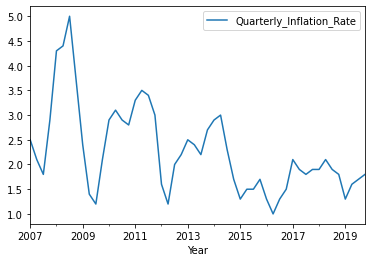

In [11]:
df.plot()

In [12]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Quarterly_Inflation_Rate'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Quarterly_Inflation_Rate):
    result=adfuller(Quarterly_Inflation_Rate)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(df['Quarterly_Inflation_Rate'])

ADF Test Statistic : -1.256424751951442
p-value : 0.6488649535421371
#Lags Used : 8
Number of Observations Used : 43
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [16]:
df['Inflation rate First Difference'] = df['Quarterly_Inflation_Rate'] - df['Quarterly_Inflation_Rate'].shift(1)

In [17]:
df['Quarterly_Inflation_Rate'].shift(1).head()

Year
2007-03-01    NaN
2007-06-01    2.5
2007-09-01    2.1
2007-12-01    1.8
2008-03-01    2.9
Name: Quarterly_Inflation_Rate, dtype: float64

In [18]:
df['Seasonal First Difference']=df['Quarterly_Inflation_Rate']-df['Quarterly_Inflation_Rate'].shift(4)

In [19]:
df.head(10)

,Quarterly_Inflation_Rate,Inflation rate First Difference,Seasonal First Difference
Year,,,
2007-03-01,2.5,NaN,NaN
2007-06-01,2.1,-0.4,NaN
2007-09-01,1.8,-0.3,NaN
2007-12-01,2.9,1.1,NaN
2008-03-01,4.3,1.4,1.8
2008-06-01,4.4,0.1,2.3
2008-09-01,5.0,0.6,3.2
2008-12-01,3.7,-1.3,0.8
2009-03-01,2.4,-1.3,-1.9


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.2712690751492977
p-value : 0.18140173362755974
#Lags Used : 8
Number of Observations Used : 39
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Year'>

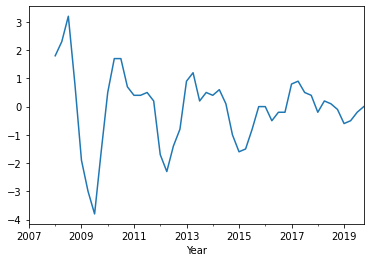

In [21]:
df['Seasonal First Difference'].plot()

In [22]:
## Again test dickey fuller test
adfuller_test(df['Inflation rate First Difference'].dropna())

ADF Test Statistic : -5.220683461319861
p-value : 7.976284218486046e-06
#Lags Used : 8
Number of Observations Used : 42
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Year'>

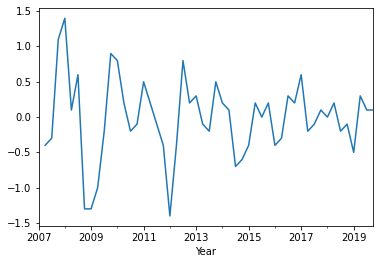

In [23]:
df['Inflation rate First Difference'].plot()

## Auto Regressive Model

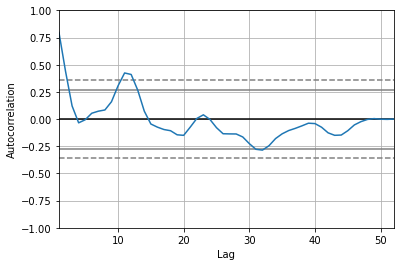

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Quarterly_Inflation_Rate'])
plt.show()

#### Final Thoughts on Autocorrelation and Partial Autocorrelation                                          
Identification of an AR model is often best done with the PACF.                                                          
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.                                 

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.                         

p,d,q p AR model lags d differencing q MA lags                

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

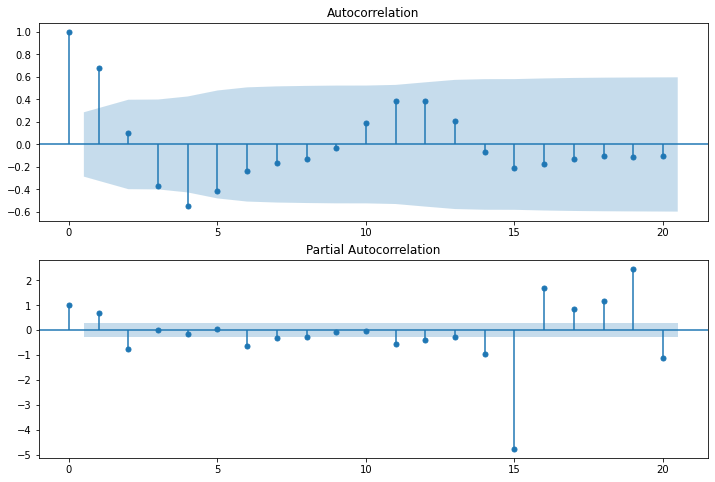

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[5:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[5:],lags=20,ax=ax2)

In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model=ARIMA(df['Quarterly_Inflation_Rate'],order=(1,1,0))
model_fit=model.fit()

In [29]:
model_fit.aic

82.53103931280764

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D.Quarterly_Inflation_Rate   No. Observations:                   51
Model:                         ARIMA(1, 1, 0)   Log Likelihood                 -38.266
Method:                               css-mle   S.D. of innovations              0.512
Date:                        Mon, 08 Feb 2021   AIC                             82.531
Time:                                18:34:38   BIC                             88.327
Sample:                            06-01-2007   HQIC                            84.746
                                 - 12-01-2019                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0170      0.115     -0.147      0.883      -0.243       0.209
ar.L1.D.Quarterly_Inflation_Rate     0.3871      0.128      3.030      0.002       0.137       0.638
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5834           +0.0000j            2.5834            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Year'>

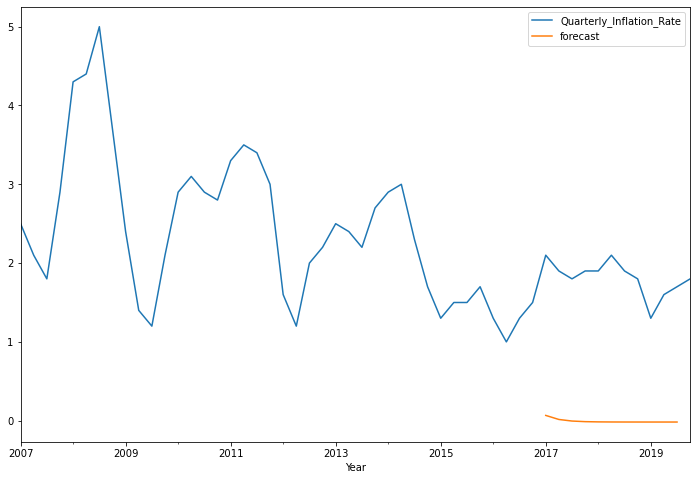

In [31]:
df['forecast']=model_fit.predict(start=40,end=50,dynamic=True)
df[['Quarterly_Inflation_Rate','forecast']].plot(figsize=(12,8))

In [32]:
model=sm.tsa.statespace.SARIMAX(df['Quarterly_Inflation_Rate'],order=(1,1,0),seasonal_order=(1,1,0,4))
results=model.fit()

In [33]:
predict_rate=results.predict(start=40,end=50,dynamic=True)
print(predict_rate)

2017-03-01    1.313029
2017-06-01    1.420611
2017-09-01    1.566704
2017-12-01    1.782260
2018-03-01    1.466074
2018-06-01    1.316710
2018-09-01    1.561990
2018-12-01    1.768111
2019-03-01    1.534444
2019-06-01    1.548859
2019-09-01    1.730983
Freq: QS-DEC, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Year'>

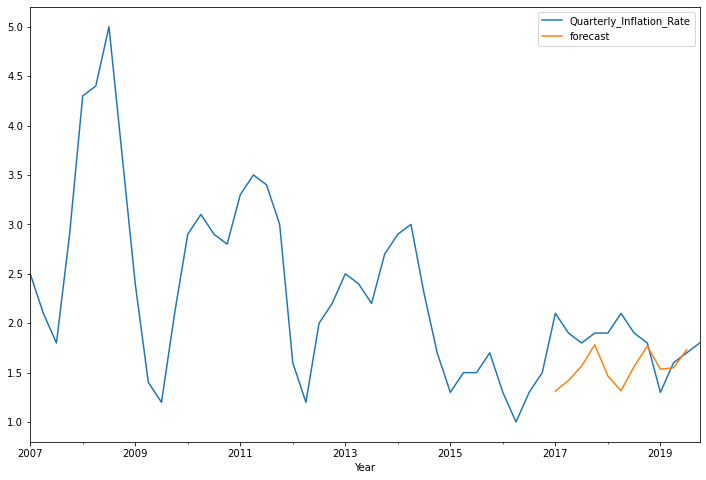

In [34]:
df['forecast']=results.predict(start=40,end=50,dynamic=True)
df[['Quarterly_Inflation_Rate','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36,3)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df.tail()

,Quarterly_Inflation_Rate,Inflation rate First Difference,Seasonal First Difference,forecast
2021-09-01,NaN,NaN,NaN,NaN
2021-12-01,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

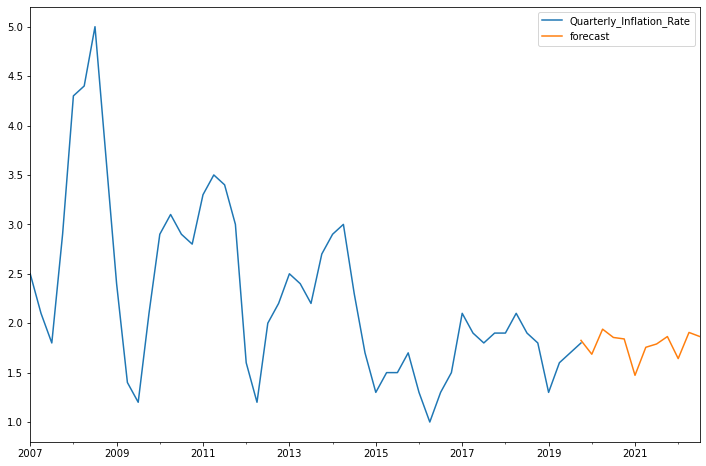

In [39]:
future_df['forecast'] = results.predict(start = 51, end = 65, dynamic= True)  
future_df[['Quarterly_Inflation_Rate', 'forecast']].plot(figsize=(12, 8)) 

In [40]:
future_df.tail(12)

,Quarterly_Inflation_Rate,Inflation rate First Difference,Seasonal First Difference,forecast
2019-12-01,1.8,0.1,0.0,1.826181
2020-03-01,NaN,NaN,NaN,1.686004
2020-06-01,NaN,NaN,NaN,1.939550
2020-09-01,NaN,NaN,NaN,1.855637
2020-12-01,NaN,NaN,NaN,1.840737
2021-03-01,NaN,NaN,NaN,1.472583
2021-06-01,NaN,NaN,NaN,1.756251
2021-09-01,NaN,NaN,NaN,1.789726
2021-12-01,NaN,NaN,NaN,1.864798
2022-03-01,NaN,NaN,NaN,1.641922


## Calculate Forecast Errors

#### Mean absolute error:
The mean absolute error (MAE) value is computed as the average absolute error value. If this value is 0 (zero), the fit (forecast) is perfect. As compared to the mean squared error value, this measure of fit will “de-emphasize” outliers, that is, unique or rare large error values will affect the MAE less than the MSE value.

#### Mean Forecast Error (Bias).
The mean forecast error (MFE) is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations, and a large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal.

The MAE is a better indicator of fit than the MFE.

In [41]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [42]:
print("MFE = ", mean_forecast_err(df.Quarterly_Inflation_Rate, predict_rate))
print("MAE = ", mean_absolute_err(df.Quarterly_Inflation_Rate, predict_rate))

MFE =  0.27183865477468194
MAE =  0.17761641051430951


For MFE > 0, models tends to under-forecast. However, as long as the tracking signal is between –4 and 4, we assume the model is working correctly. The measure of MAE being small would indicate a pretty good fit